In [1]:
# Load pacakges
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn  as sns
from pathlib import Path

In [80]:
sns.set_context('notebook', font_scale=1.2)

In [2]:
# Set directory path
project_dir = Path().absolute()
data_dir = project_dir/'data'

# Introduction

## Let's try an intuitive example

In [235]:
# Import temperature data
data = pd.read_csv(data_dir/'city_temperatures.csv')

# Data characteristics
print(data.shape)
display(data.head())

(1000, 3)


,temperature Boston,temperature Chicago,temperature Melbourne
0,71.819610,63.015361,36.237695
1,49.095997,39.059582,52.137500
2,44.255227,31.177555,64.899849
3,46.680087,39.936758,63.828346
4,52.137843,38.695420,52.574748


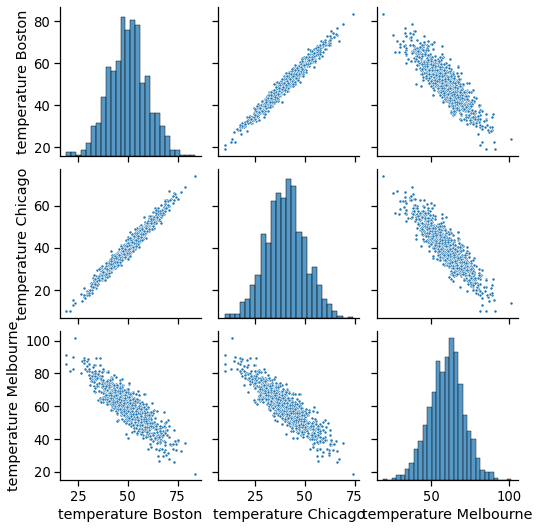

In [183]:
# What is the relationship between the temperature in different cities?
sns.pairplot(data=data, markers='.')

In [184]:
# Calculate the correlation between the temperatures in different cities
data.corr()

,temperature Boston,temperature Chicago,temperature Melbourne
temperature Boston,1.000000,0.981133,-0.871419
temperature Chicago,0.981133,1.000000,-0.887909
temperature Melbourne,-0.871419,-0.887909,1.000000


Since the temperatures seem to be highly correlated perhaps we can represent most of the weather information using a single feature

## PCA on our intuitive example

In [185]:
# Step 1 - import PCA object from sklearn
from sklearn.decomposition import PCA

In [236]:
# Step 2 - decide how many final features we want to keep, and initialize pca object accordingly
n_components= 2
pca = PCA(n_components)

In [237]:
# Step 3 - fit the data and get transformed coordinates
transformed_data = pca.fit_transform(data)

In [238]:
transformed_df = pd.DataFrame(data = transformed_data, columns=['PC' + str(i) for i in range(1,n_components+1)])
print(transformed_df.shape)
display(transformed_df.head())

(1000, 2)


,PC1,PC2
0,39.332333,-1.183321
1,3.621822,7.009858
2,-11.405942,2.576508
3,-4.503943,-1.294497
4,4.793715,5.359363


In [189]:
# Step 4 - how much of the total variance does the PCA tranformation capture?
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.93902794 0.05551693]
0.9945448618766217


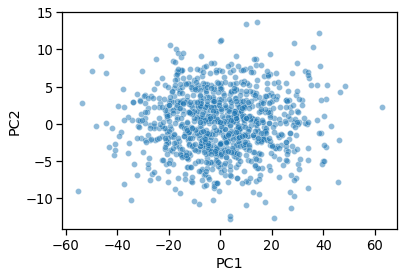

In [190]:
# Plotting the 2D representation of the data
plt.figure()
sns.scatterplot(data=transformed_df, x='PC1', y='PC2', alpha=0.5)
plt.show()

In [191]:
# check the correlation between the transformed components
transformed_df.corr()

,PC1,PC2
PC1,1.000000e+00,3.868722e-17
PC2,3.868722e-17,1.000000e+00


All the dimensions are now uncorrelated

However, our data does not look similar to the original - why is that?

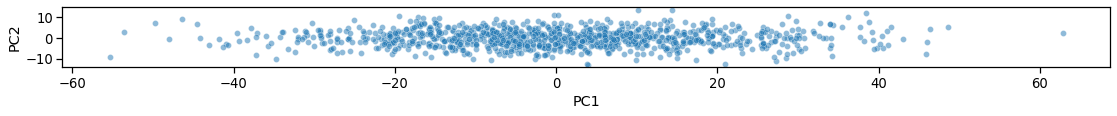

In [192]:
# Correctly plotting the reduced features - using the explained variance ratio
size_factor = 20
plt.figure(figsize=(pca.explained_variance_ratio_[0]*size_factor, pca.explained_variance_ratio_[1]*size_factor))
sns.scatterplot(data=transformed_df, x='PC1', y='PC2', alpha=0.5)
plt.show()

As expected from the explained variance ratio, ~94% of the variance is along PC1 and 5% along PC2.
<br> PC1 always explains the highest variance, followed in decreasing order as more PCs are added.
<br> If the number of PCs is equal to the number of original dimensions, 100% of the variance will be explained.

## Diagnostic plots

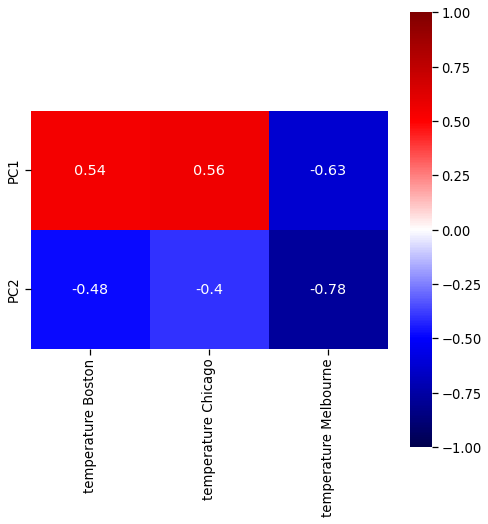

In [196]:
# What features make up 'PC1' and 'PC2'?
plt.figure(figsize=(8,8))
sns.heatmap(pca.components_, square=True, annot=True, 
            xticklabels=pca.feature_names_in_, yticklabels=['PC1', 'PC2'], cmap='seismic', vmin=-1, vmax=1);

Do these loadings make sense? Recall the correlation values from before.
<br> Also recall that PC1 and PC2 should be uncorrelated, and PC1 explains ~94% of the total variance in the data.

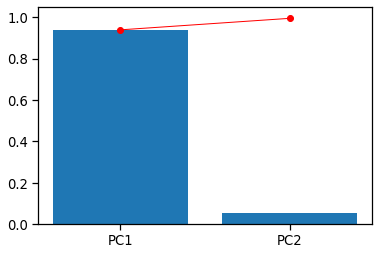

In [239]:
plt.figure()
plt.bar( x=transformed_df.columns, height=pca.explained_variance_ratio_,)
plt.plot(transformed_df.columns, np.cumsum(pca.explained_variance_ratio_), 'r-o', linewidth=1)
plt.ylim([0,1.05])
plt.show()

In [198]:
np.cumsum(pca.explained_variance_ratio_)

array([0.93902794, 0.99454486])

# Exercise : PCA on breast cancer dataset

In [214]:
# Data import
data = pd.read_csv(data_dir/'breast_cancer_10d.csv', index_col=0)

In [215]:
data.head()

,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,symmetry,fractal_dimension
Diagnosis,,,,,,,,,,
M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [216]:
# how many of each class Benign or Malignant tissue samples in this data?
data.groupby(by='Diagnosis').count().iloc[:,:1]

,radius
Diagnosis,
B,357
M,212


In [217]:
# mean properties by class
data.groupby(by='Diagnosis').mean()

,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,symmetry,fractal_dimension
Diagnosis,,,,,,,,,,
B,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867
M,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680


## Exercise 1
Explore the data

In [218]:
# How many obeservations and features are in this dataset?
data.shape

(569, 10)

In [219]:
# Whats is the correlation structure of the data?
data.corr()

,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,symmetry,fractal_dimension
radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave_points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921
fractal_dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000


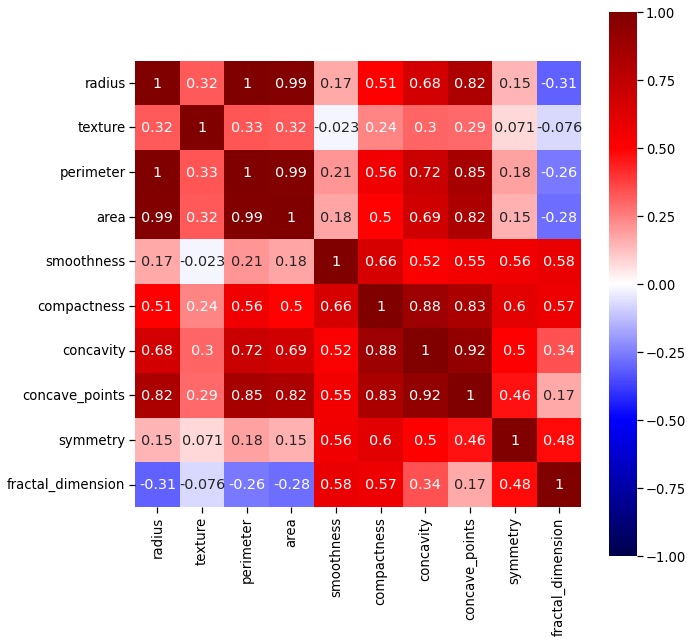

In [220]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, cmap='seismic', vmin=-1, vmax=1, square=True)
plt.show()

## Exercise 2
Initialize a PCA object with 3 components

In [221]:
from sklearn.decomposition import PCA

In [223]:
n_components = 10
pca = PCA(n_components)

## Exercise 3
Get transformed data coordinates using PCA

In [224]:
# fit transform using the pca object
transformed_data = pca.fit_transform(data)

In [225]:
# convert to a dataframe for ease
transformed_df = pd.DataFrame(data = transformed_data, columns=['PC' + str(i) for i in range(1, n_components+1)])

In [226]:
# how many features are in the transformed dataset?
transformed_df.shape

(569, 10)

## Exercise 4
Plot the first 2 PCs for the transformed data

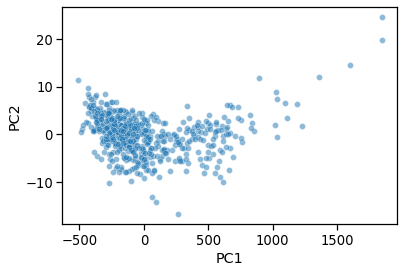

In [147]:
# plot
plt.figure()
sns.scatterplot(data=transformed_df, x='PC1', y='PC2', alpha=0.5)
plt.show()

What is the feature correlation of the transformed data?

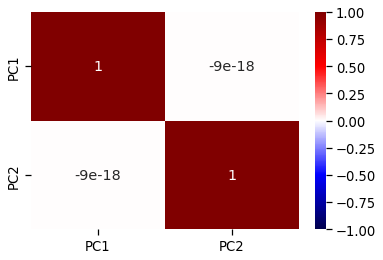

In [241]:
sns.heatmap(transformed_df.corr(), annot=True, cmap='seismic', vmin=-1, vmax=1);

## Exercise 5
Explained variance

How much of the original variance does the transformed data capture?

In [156]:
print(sum(pca.explained_variance_ratio_))

0.999999566090123


How much of the total variance does PC1 explain?

In [152]:
pca.explained_variance_ratio_[0]

0.9997375949745286

How much of the total variance does PC2 explain?

In [153]:
pca.explained_variance_ratio_[1]

0.00014192241246281241

Plot PC1 and PC2 with reasonable size factors taking into account the explained variance of PC1 and PC2

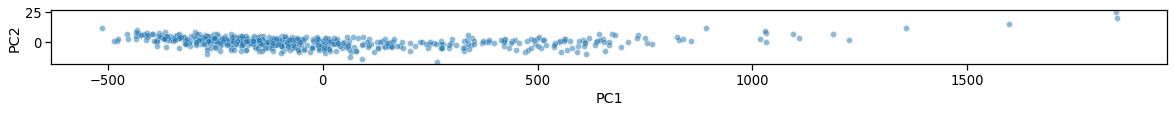

In [155]:
# Correctly plotting the reduced features - using the explained variance ratio
plt.figure(figsize=(20,1))
sns.scatterplot(data=transformed_df, x='PC1', y='PC2', alpha=0.5)
plt.show()

## Exercise 6
Plot the explained variance for each component

In [228]:
transformed_df.columns

Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'], dtype='object')

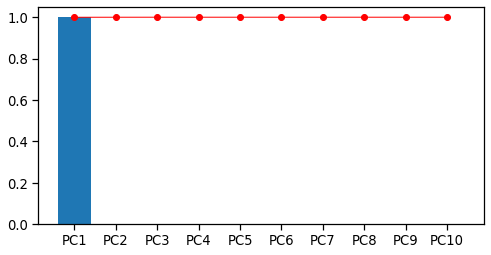

In [234]:
plt.figure(figsize=(8,4))
plt.bar( x=transformed_df.columns, height=pca.explained_variance_ratio_,)
plt.plot(transformed_df.columns, np.cumsum(pca.explained_variance_ratio_), 'r-o', linewidth=1)
plt.ylim([0,1.05])
plt.show()

How many PCs do you need to faithfully represent this 10-dimensional dataset?

## Exercise 7
What features make up PC1 and PC2? Plot this

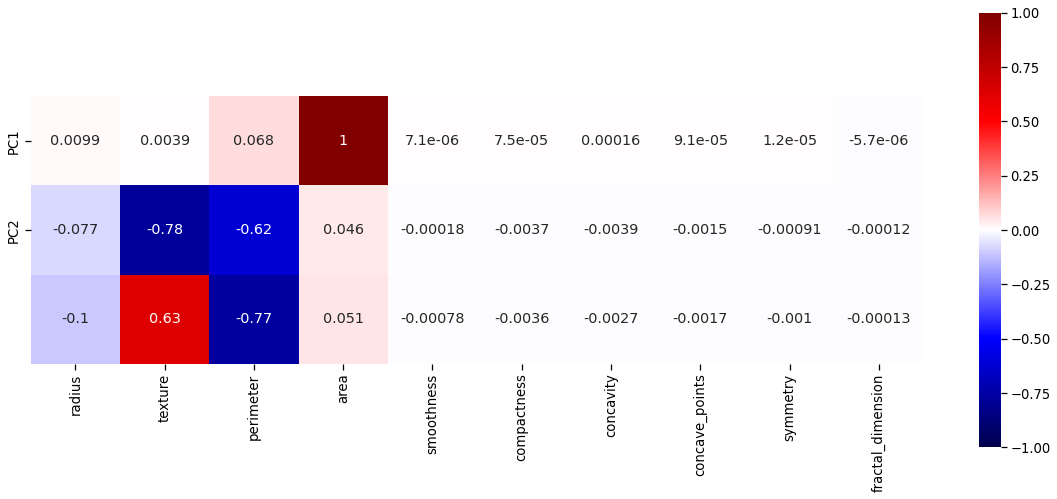

In [164]:
plt.figure(figsize=(20,8))
sns.heatmap(pca.components_, square=True, annot=True, 
            xticklabels=pca.feature_names_in_, yticklabels=['PC1', 'PC2'], cmap='seismic', vmin=-1, vmax=1);

The absolute value of the loading is more important that the sign. Think correlation : -1 and +1 indicate high correlation, 0 indicates no correlation

# Pitfalls and Assumptions of PCA

## PCA is not scale invariant

PCA works to minimize the variance, however variance has units!
<br> What if the units of the data are changed?

In [243]:
data = pd.read_csv(data_dir/'breast_cancer_10d.csv', index_col=0)

Area seems to be the most important feature loaded on PC1. What is the variance of the area feature?

In [244]:
data['area'].var()

123843.55431768115

### Exercise:
Scale the area by 0.01 and calculate the factor loadings on PC1 again

In [245]:
scale_factor = 0.01
data['area'] = data['area'] * scale_factor

In [249]:
pca = PCA(n_components=3)
transformed_data = pca.fit_transform(data)

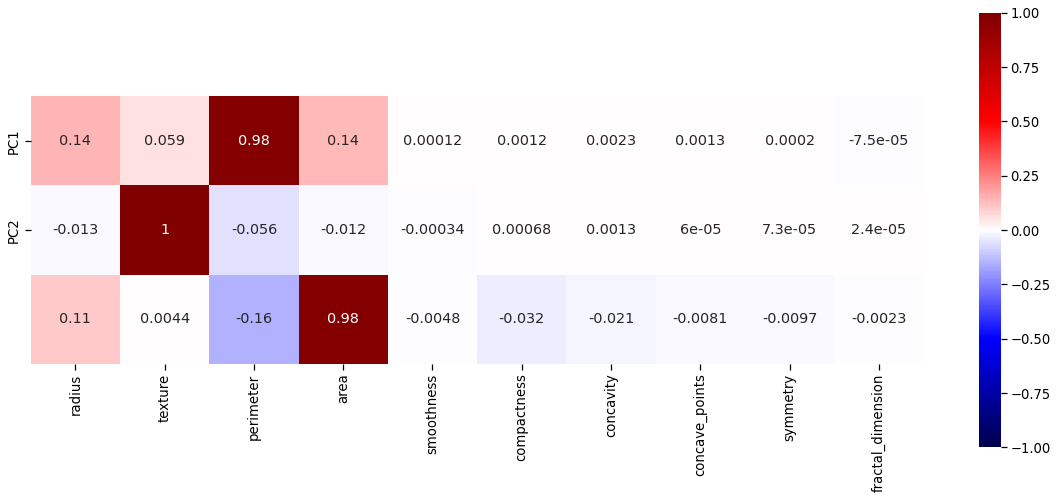

In [250]:
plt.figure(figsize=(20,8))
sns.heatmap(pca.components_, square=True, annot=True, 
            xticklabels=pca.feature_names_in_, yticklabels=['PC1', 'PC2'], cmap='seismic', vmin=-1, vmax=1);

Compare the change in loading for area.

## Correcting for scale - standardization

In [252]:
from sklearn.preprocessing import StandardScaler

In [253]:
data = data = pd.read_csv(data_dir/'breast_cancer_10d.csv', index_col=0)

In [259]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data)
scaled_df = pd.DataFrame(data = scaled_features, columns=data.columns, index=data.index)

### Exercise
Calculate the factor loadings for scaled data

In [262]:
pca = PCA(n_components=3)
transformed_data = pca.fit_transform(scaled_df)

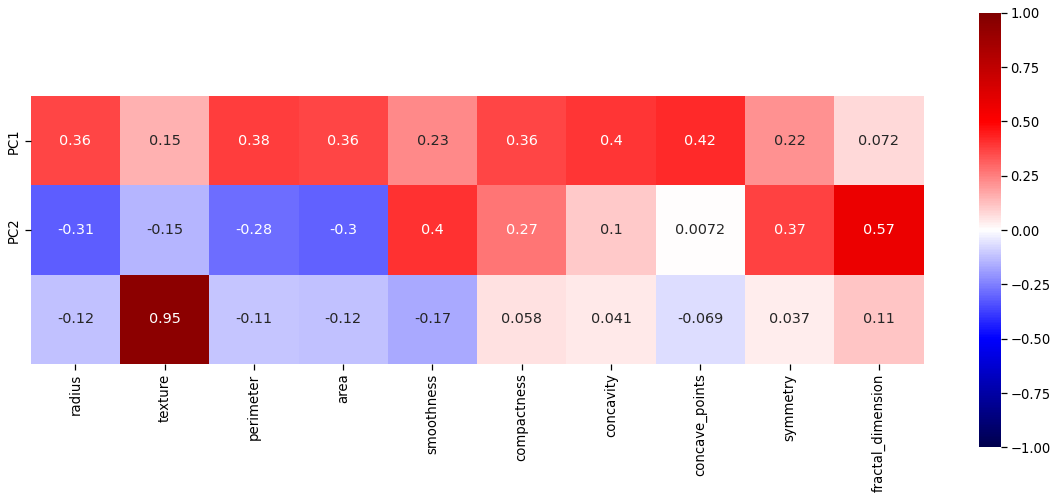

In [263]:
plt.figure(figsize=(20,8))
sns.heatmap(pca.components_, square=True, annot=True, 
            xticklabels=pca.feature_names_in_, yticklabels=['PC1', 'PC2'], cmap='seismic', vmin=-1, vmax=1);

### Exercise
How much variance does PC1 explain now?

In [264]:
print(pca.explained_variance_ratio_[0])

0.5478587991720022


What is the total variance captured by all 3 PCs?

In [270]:
print(sum(pca.explained_variance_ratio_))

0.8877916756334362


### Exercise
Plot the explained variance by PC 

In [266]:
transformed_df = pd.DataFrame(data = transformed_data, columns=['PC' + str(i) for i in range(1, 4)])

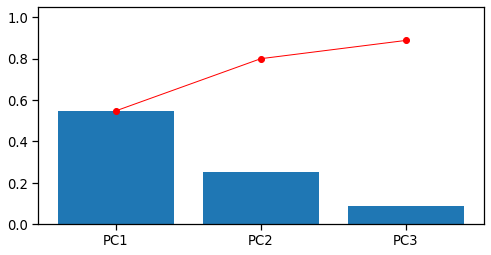

In [267]:
plt.figure(figsize=(8,4))
plt.bar( x=transformed_df.columns, height=pca.explained_variance_ratio_,)
plt.plot(transformed_df.columns, np.cumsum(pca.explained_variance_ratio_), 'r-o', linewidth=1)
plt.ylim([0,1.05])
plt.show()

## PCA assumes normally-distributed data

Often biological data is not normally distributed. How does PCA handle non-normal or skewed distributions?
<br> Let's make up some random data that has no correlation between features

In [273]:
# Let's make up some data
P = 5 # number of features
N = 1000 # number of observations

In [297]:
def plot_PCA(data_matrix, distribution_str, ax):
    """ Transforms data_matrix into 2D reduced space using PCA and plots PC1 vs PC2
    Args:
        data_matrix -- data array
        distribution_str -- name of the distribution used to generate data matrix
    """
    X_reduced = PCA(n_components = 2).fit_transform(data_matrix)
    ax.scatter(X_reduced[:, 0], X_reduced[:, 1], s = 10, c = 'orange', alpha=0.5)
    ax.set_title('PCA: ' + distribution_str + ' Data', fontsize = 14)
    ax.set_xlabel("PC1", fontsize = 14); ax.set_ylabel("PC2", fontsize = 14)

In [295]:
np.random.seed(15) # for consistency

### Exercise:
If all the features are random, what should the feature loading on PCs look like?

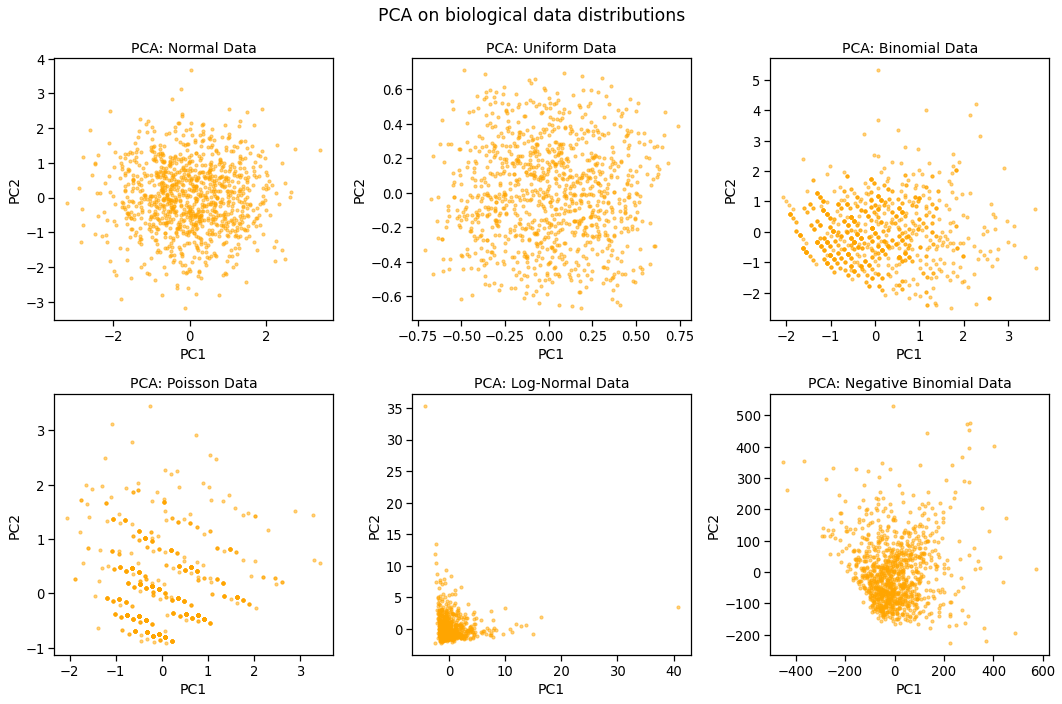

In [301]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))

data_matrix = np.random.normal(0, 1, N*P).reshape(N, P)
plot_PCA(data_matrix, 'Normal', axes.flat[0])

data_matrix = np.random.uniform(0, 1, N*P).reshape(N, P)
plot_PCA(data_matrix, 'Uniform', axes.flat[1])

data_matrix = np.random.binomial(10, 0.1, N*P).reshape(N, P)
plot_PCA(data_matrix, 'Binomial', axes.flat[2])

data_matrix = np.random.poisson(0.5, N*P).reshape(N, P)
plot_PCA(data_matrix, 'Poisson', axes.flat[3])

data_matrix = np.random.lognormal(0, 1, N*P).reshape(N, P)
plot_PCA(data_matrix, 'Log-Normal', axes.flat[4])

data_matrix = np.random.negative_binomial(1, 0.01, N*P).reshape(N, P)
plot_PCA(data_matrix, 'Negative Binomial', axes.flat[5])

plt.suptitle('PCA on biological data distributions')
plt.tight_layout()
plt.show()

## Correcting for non-normal distributions

Often log-transform and scaling are used to correct (somewhat) for non-normal distributions before PCA is applied

In [300]:
def plot_PCA_transformed(data_matrix, distribution_str, ax):
    """ Log transforms and normalizes data before PCA
        Transforms data_matrix into 2D reduced space using PCA and plots PC1 vs PC2
    Args:
        data_matrix -- data array
        distribution_str -- name of the distribution used to generate data matrix
    """
    # log transform
    data_matrix = np.log(data_matrix + np.abs(np.min(data_matrix)) + 1)
    # scale
    data_matrix = (data_matrix - np.mean(data_matrix, 
                                         axis = 0)) / np.std(data_matrix, axis = 0)
    # PCA
    X_reduced = PCA(n_components = 2).fit_transform(data_matrix)
    ax.scatter(X_reduced[:, 0], X_reduced[:, 1], s = 10, c = 'orange', alpha=0.5)
    ax.set_title('PCA: ' + distribution_str + ' Data', fontsize = 14)
    ax.set_xlabel("PC1", fontsize = 14); ax.set_ylabel("PC2", fontsize = 14)

### Exercise
Re-run all the previous data with log transformed and scaled values now

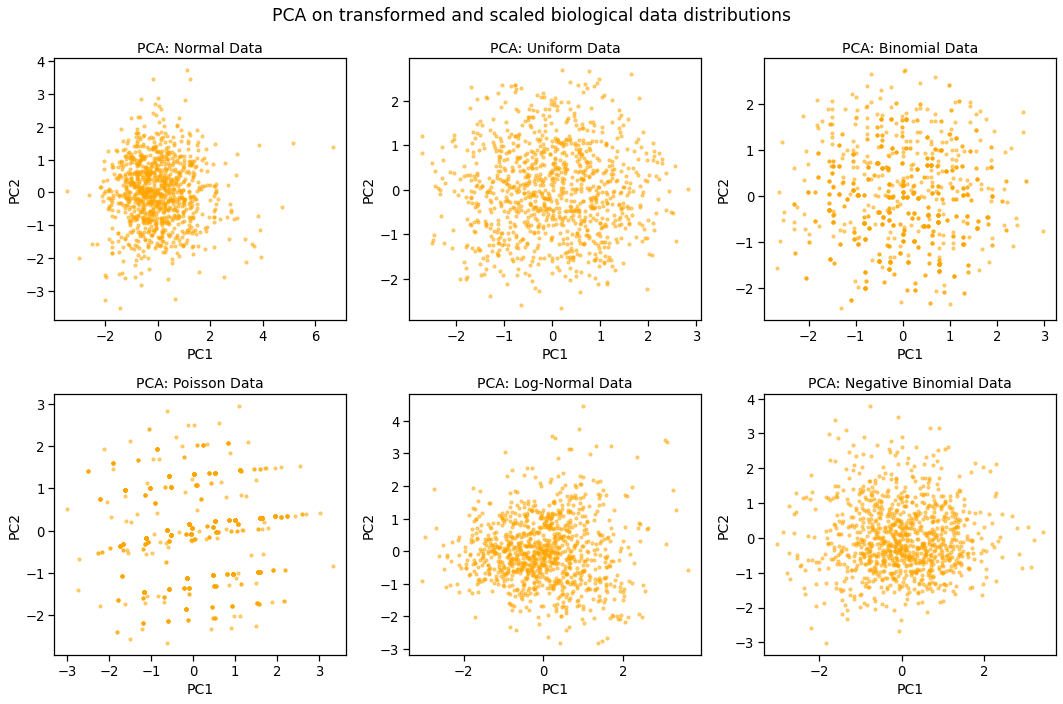

In [302]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))

data_matrix = np.random.normal(0, 1, N*P).reshape(N, P)
plot_PCA_transformed(data_matrix, 'Normal', axes.flat[0])

data_matrix = np.random.uniform(0, 1, N*P).reshape(N, P)
plot_PCA_transformed(data_matrix, 'Uniform', axes.flat[1])

data_matrix = np.random.binomial(10, 0.1, N*P).reshape(N, P)
plot_PCA_transformed(data_matrix, 'Binomial', axes.flat[2])

data_matrix = np.random.poisson(0.5, N*P).reshape(N, P)
plot_PCA_transformed(data_matrix, 'Poisson', axes.flat[3])

data_matrix = np.random.lognormal(0, 1, N*P).reshape(N, P)
plot_PCA_transformed(data_matrix, 'Log-Normal', axes.flat[4])

data_matrix = np.random.negative_binomial(1, 0.01, N*P).reshape(N, P)
plot_PCA_transformed(data_matrix, 'Negative Binomial', axes.flat[5])

plt.suptitle('PCA on transformed and scaled biological data distributions')
plt.tight_layout()
plt.show()

Compare the untransformed and transformed distributions

## Clustering on transformed data - proceed with caution

## Outliers have an outsized effect 

## Adequate sample size is necessary to get robust results